In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv("Real_Estate.csv")

In [ ]:
#Selecting features and targets
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = data[features].values
y = data[target].values

#Split the dataset into training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize Model
degree = 1  # Change the degree of the polynomial as needed
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())


In [ ]:
#Fit the Model
model.fit(X_train, y_train)

#Predict using the model
y_pred_poly = model.predict(X_test)

In [ ]:
#Calculate Matrices
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)


Mean Squared Error (Polynomial Regression): 124.57938927543914
R-squared (Polynomial Regression): 0.5496730640945564


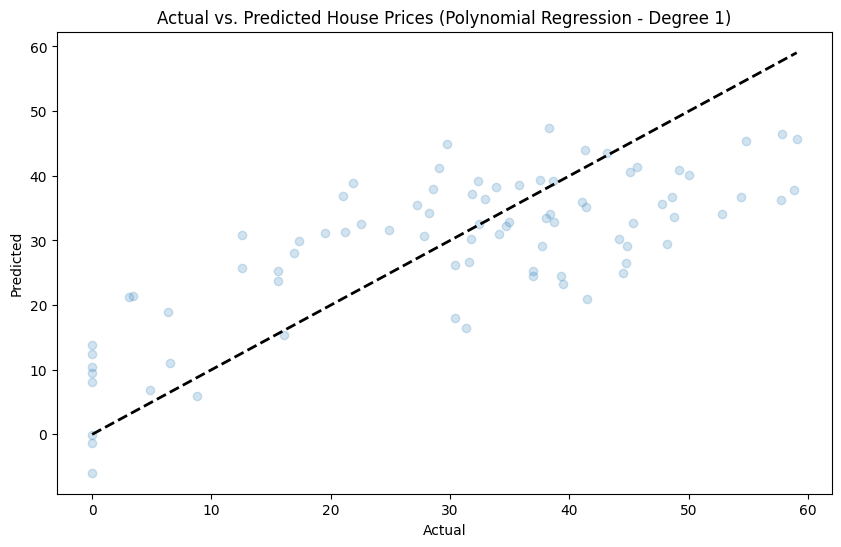

In [ ]:
#Visualize actual vs predict value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted House Prices (Polynomial Regression - Degree {degree})')
plt.show()